In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
data = pd.read_csv("/content/drive/MyDrive/Intern2Grow/social_media_data.csv")

In [3]:
data

,date,platform,post_type,likes,shares,comments,views
0,2023-05-24,Twitter,image,868.0,238.0,352.0,8836.0
1,2023-02-23,Twitter,image,944.0,610.0,146.0,5554.0
2,2023-03-18,Instagram,image,1067.0,858.0,365.0,4018.0
3,2023-06-12,Twitter,text,780.0,427.0,100.0,6999.0
4,2023-02-03,Instagram,text,836.0,893.0,443.0,5802.0
...,...,...,...,...,...,...,...
1995,2023-01-15,Facebook,video,2039.0,523.0,371.0,4780.0
1996,2022-11-13,Twitter,image,1652.0,891.0,410.0,8741.0
1997,2023-09-18,Twitter,video,528.0,207.0,341.0,6588.0
1998,2023-04-23,Facebook,video,1288.0,893.0,328.0,8349.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2000 non-null   object 
 1   platform   2000 non-null   object 
 2   post_type  2000 non-null   object 
 3   likes      1992 non-null   float64
 4   shares     1992 non-null   float64
 5   comments   1992 non-null   float64
 6   views      1990 non-null   float64
dtypes: float64(4), object(3)
memory usage: 109.5+ KB


In [5]:
data.describe()

,likes,shares,comments,views
count,1992.000000,1992.000000,1992.000000,1990.000000
mean,1289.795181,497.286647,305.847892,6966.834673
std,525.123426,229.809511,114.761598,1724.795879
min,400.000000,100.000000,100.000000,4000.000000
25%,820.000000,300.000000,206.000000,5507.000000
50%,1292.000000,491.000000,310.500000,6947.000000
75%,1753.250000,688.000000,407.000000,8398.250000
max,2200.000000,900.000000,500.000000,9998.000000


In [6]:
data.head()

,date,platform,post_type,likes,shares,comments,views
0,2023-05-24,Twitter,image,868.0,238.0,352.0,8836.0
1,2023-02-23,Twitter,image,944.0,610.0,146.0,5554.0
2,2023-03-18,Instagram,image,1067.0,858.0,365.0,4018.0
3,2023-06-12,Twitter,text,780.0,427.0,100.0,6999.0
4,2023-02-03,Instagram,text,836.0,893.0,443.0,5802.0


In [7]:
data.tail()

,date,platform,post_type,likes,shares,comments,views
1995,2023-01-15,Facebook,video,2039.0,523.0,371.0,4780.0
1996,2022-11-13,Twitter,image,1652.0,891.0,410.0,8741.0
1997,2023-09-18,Twitter,video,528.0,207.0,341.0,6588.0
1998,2023-04-23,Facebook,video,1288.0,893.0,328.0,8349.0
1999,2023-08-13,Twitter,image,835.0,532.0,424.0,9236.0


In [8]:
data.columns

Index(['date', 'platform', 'post_type', 'likes', 'shares', 'comments',
       'views'],
      dtype='object')

In [9]:
data["date"] = pd.to_datetime(data["date"])
data

,date,platform,post_type,likes,shares,comments,views
0,2023-05-24,Twitter,image,868.0,238.0,352.0,8836.0
1,2023-02-23,Twitter,image,944.0,610.0,146.0,5554.0
2,2023-03-18,Instagram,image,1067.0,858.0,365.0,4018.0
3,2023-06-12,Twitter,text,780.0,427.0,100.0,6999.0
4,2023-02-03,Instagram,text,836.0,893.0,443.0,5802.0
...,...,...,...,...,...,...,...
1995,2023-01-15,Facebook,video,2039.0,523.0,371.0,4780.0
1996,2022-11-13,Twitter,image,1652.0,891.0,410.0,8741.0
1997,2023-09-18,Twitter,video,528.0,207.0,341.0,6588.0
1998,2023-04-23,Facebook,video,1288.0,893.0,328.0,8349.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       2000 non-null   datetime64[ns]
 1   platform   2000 non-null   object        
 2   post_type  2000 non-null   object        
 3   likes      1992 non-null   float64       
 4   shares     1992 non-null   float64       
 5   comments   1992 non-null   float64       
 6   views      1990 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 109.5+ KB





---

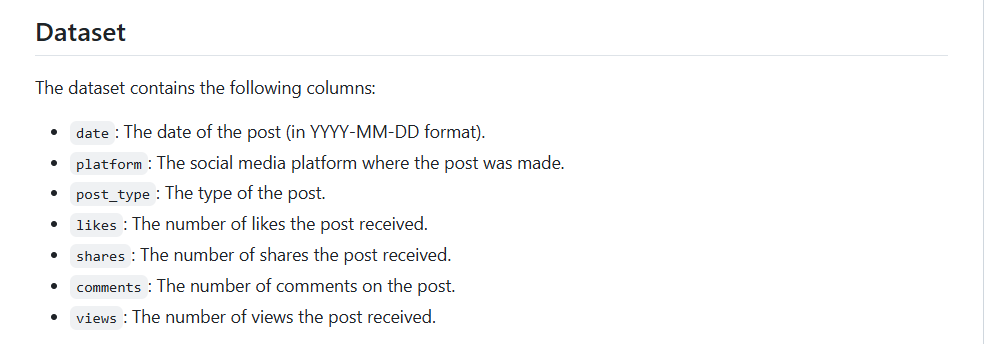




---



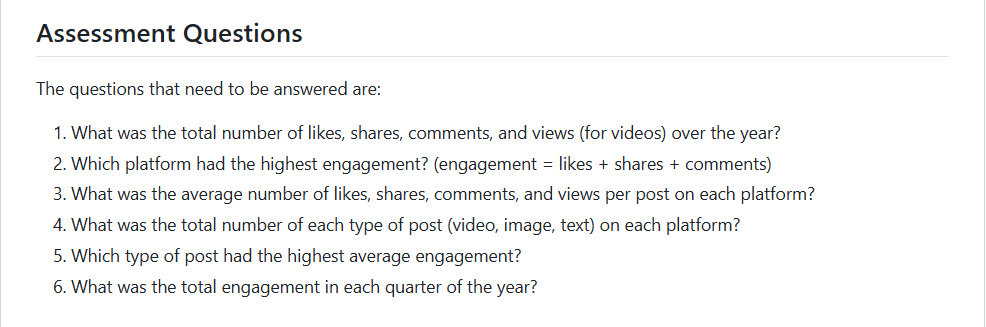

# **1- What was the total number of likes, shares, comments, and views (for videos) over the year?**

In [11]:
TotalVideosEngagement = data.groupby(data["post_type"] == "video")[["likes","shares","comments","views"]].sum()
TotalVideosEngagement

,likes,shares,comments,views
post_type,,,,
False,1753102.0,679555.0,415110.0,9399270.0
True,816170.0,311040.0,194139.0,4464731.0





---




# **2- Which platform had the highest engagement?
(engagement = likes + shares + comments)**


# **2- Which platform had the highest engagement?**
# **(engagement = likes + shares + comments)**

In [12]:
PlatformsWithHighEngagement = data.groupby(data["platform"])[["likes","shares","comments"]].sum()
PlatformsTotalEngagement = PlatformsWithHighEngagement["likes"] + PlatformsWithHighEngagement["shares"] + PlatformsWithHighEngagement["comments"]
PlatformWithHighEngagement = PlatformsTotalEngagement.sort_values(ascending=False).head(1)
PlatformWithHighEngagement

platform
Instagram    1420579.0
dtype: float64




---



# **3- What was the average number of likes, shares, comments, and views per post on each platform?**

In [13]:
PlatformsWithMeanEngagement = data.groupby(data["platform"])[["likes","shares","comments","views"]].mean()
PlatformsWithMeanEngagement

,likes,shares,comments,views
platform,,,,
Facebook,1289.982428,513.141494,311.160317,6984.239234
Instagram,1305.837278,497.372404,301.046062,6905.875556
NonExistingPlatform,1150.166667,515.833333,285.500000,6729.166667
Twitter,1274.994152,482.437775,305.857980,7013.258065





---




# **4- What was the total number of each type of post (video, image, text) on each platform?**

In [14]:
TotalVideosEngagement = data.groupby(data["post_type"] == "video")[["likes","shares","comments","views"]].sum()
TotalImagesEngagement = data.groupby(data["post_type"] == "image")[["likes","shares","comments","views"]].sum()
TotalTextEngagement = data.groupby(data["post_type"] == "text")[["likes","shares","comments","views"]].sum()

print(TotalVideosEngagement)
print(TotalImagesEngagement)
print(TotalTextEngagement)

               likes    shares  comments      views
post_type                                          
False      1753102.0  679555.0  415110.0  9399270.0
True        816170.0  311040.0  194139.0  4464731.0
               likes    shares  comments      views
post_type                                          
False      1640762.0  628362.0  383431.0  8826326.0
True        928510.0  362233.0  225818.0  5037675.0
               likes    shares  comments      views
post_type                                          
False      1744680.0  673273.0  419957.0  9502406.0
True        824592.0  317322.0  189292.0  4361595.0





---




# **5- Which type of post had the highest average engagement?**

In [15]:
AverageEngagementPerPostType = data.groupby(data["post_type"])[["likes","shares","comments","views"]].mean()
AverageEngagementPerPostType


,likes,shares,comments,views
post_type,,,,
image,1266.725784,494.178718,307.653951,6872.680764
text,1319.347200,506.904153,302.867200,6967.404153
video,1287.334385,491.374408,306.696682,7075.643423





---




# **6-What was the total engagement in each quarter of the year?**


In [16]:
TotalEngagementPerQuarter = data.groupby(data["date"].dt.quarter)[["likes","shares","comments","views"]].sum()
TotalEngagementPerQuarter

,likes,shares,comments,views
date,,,,
1,629848.0,247688.0,156772.0,3524498.0
2,630151.0,228698.0,144422.0,3257974.0
3,615311.0,234753.0,142869.0,3281695.0
4,693962.0,279456.0,165186.0,3799834.0





---



---



**... تم بحمد الله ...**

**... Done by : Sameh Dorgham ...**